In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
#plt.style.use('fivethirtyeight')
#sns.set(context="notebook", style="whitegrid", palette="dark")
sns.set(context="notebook", style="white")

# Logistic Regression without Regularization
---

In [17]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


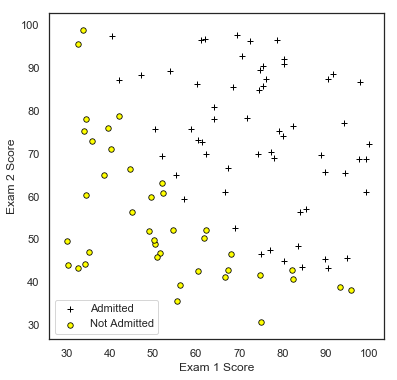

In [4]:
sns.set(context="notebook", style="white")

positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], linewidth=1, s=30, c='black', marker='+', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], linewidth=0.8, s=30, c='yellow',edgecolors='black', marker='o', label='Not Admitted')
ax.legend(loc=0)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为:$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$  
合起来，我们得到逻辑回归模型的假设函数：${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$

In [5]:
def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-z))

In [6]:
a=sigmoid(-710)  # 0
b=sigmoid(7000)  # 1
c=sigmoid(0)     # 0.5
a, b, c

c:\workspace\installed\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(0.0, 1.0, 0.5)

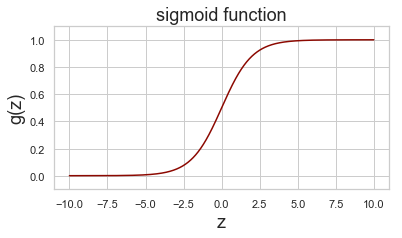

In [7]:
#plt.style.use('fivethirtyeight')
sns.set(context="notebook", style="whitegrid", palette="dark")
#sns.set(context="notebook", style="white")

nums = np.arange(-10, 10, step=0.01)
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(nums, sigmoid(nums), 'r')
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

# Regularized cost function(正则化代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
 J\left( \theta  \right) & =-\frac{1}{m}\sum\limits_{i=1}^{m}{\Bigg[{{y}^{(i)}}\log \Big( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \Big)+\left( 1-{{y}^{(i)}} \right)\log \Big( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \Big)\Bigg]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{\Bigg[-{{y}^{(i)}}\log \Big( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \Big)-\left( 1-{{y}^{(i)}} \right)\log \Big( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \Big)\Bigg]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}} \\ 
\end{align}$$  

# Regularized gradient(正则化梯度)
$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{\Big[ {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \Big] } \cdot x_j^{(i)} +\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$

In [18]:
def logisticRegressionCostFunction(X, y, theta, Lambda = 0):
    m, n = X.shape
    theta_t0_equal_0 = theta.copy()
    theta_t0_equal_0[0, 0] = 0
    
    J = np.multiply(-y, np.log(sigmoid(X @ theta))) - np.multiply((1 - y), np.log(1 - sigmoid(X @ theta)))
    J = np.mean(J)
    J_regularized_term = Lambda * np.power(theta_t0_equal_0, 2).sum() / 2 / m
    J = J + J_regularized_term
    
    gradient = X.T @ (sigmoid(X @ theta) - y) / m
    gradient_regularized_term = Lambda * theta_t0_equal_0 / m
    gradient = gradient + gradient_regularized_term
    
    return J, gradient

In [19]:
def batch_gradient_descent(X, y, initial_theta, epoch=1500, alpha=0.01, Lambda=0):
    J_set = list();

    theta = initial_theta.copy();
    for iter in range(epoch):
        [J, grad] = logisticRegressionCostFunction(X, y, theta, Lambda);
        J_set.append(J);
        theta = theta - alpha * grad;
    return theta, J_set

In [20]:
data.insert(0, 'Ones', 1)

# convert to numpy arrays and initalize the parameter array theta
X = np.array(data.iloc[:, 0:-1].values)
y = np.array(data.iloc[:, -1:].values)
m, n = X.shape

In [21]:
# Loss should approx be 0.693, gradient approx -0.1, -12.009, -11.262
logisticRegressionCostFunction(X, y, np.zeros([3, 1]))

(0.6931471805599453, array([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))

In [22]:
# 没有使用优化的函数，使用自己写的原始梯度下降
# 下降的很费劲，alpha太大又不行，200w次，还好比较接近了（归一化后可能下降的好一些）
# theta apprix -25.1612 0.20623 0.20147
# Cost apprix 0.203
alpha = 0.00159999
epoch = 2000000
Lambda = 0
initial_theta=np.matrix(np.zeros([n, 1]))

[theta, J_set] = batch_gradient_descent(X, y, initial_theta, epoch, alpha, Lambda);

In [23]:
J_set[-10:-1]

[0.20589641791013555,
 0.20589641489945434,
 0.20589641188877755,
 0.20589640887810504,
 0.20589640586743677,
 0.20589640285677288,
 0.20589639984611321,
 0.20589639683545807,
 0.20589639382480696]

In [24]:
theta

matrix([[-21.40986293],
        [  0.1762447 ],
        [  0.17110612]])

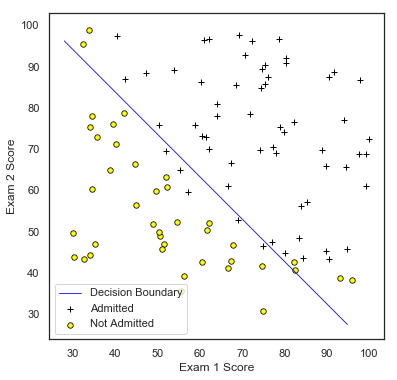

In [25]:
# Plot Decision Boundary
#plt.style.use('fivethirtyeight')
#sns.set(context="notebook", style="whitegrid", palette="dark")
sns.set(context="notebook", style="white")

positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], linewidth=1, s=30, c='black', marker='+', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], linewidth=0.8, s=30, c='yellow',edgecolors='black', marker='o', label='Not Admitted')

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# x0 * theta0 + x1 * theta1 + x2 * theta2 = 0
# x1 -> x2
x1 = np.matrix([[data['Exam 1'].min() -2, data['Exam 1'].max() - 5]]).T
x2 = ((np.multiply(theta[1], x1) + theta[0])/ (-1 * theta[2]))
plt.plot(x1, x2, c='Blue', linewidth=0.8, label='Decision Boundary')

ax.legend(loc=0)

plt.show()

In [26]:
# Predict probability for a student 
# with score 45 on exam 1 and score 85 on exam 2 
sigmoid([1, 45 ,85] * theta)
# For a student with scores 45 and 85, 
# we predict an admission probability of 0.776289
# Expected value: 0.775 +/- 0.002
# 还是有些许偏差的

matrix([[0.74367717]])

In [27]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return (prob >= 0.5).astype(int)

In [28]:
# test predict function
predict(np.matrix([[1, 45 ,85]]), theta)

matrix([[1]])

In [30]:
# Train Accuracy: 89.000000
# Expected accuracy (approx): 89.0
predictions = predict(X, theta)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
print ('accuracy = {0}%'.format(np.linalg.norm(correct, ord=1) / X.shape[0] * 100))
# 精确度居然还可以，奇迹般的一样，都是 89%

accuracy = 89.0%


# Regularized Logistic Regression
---

In [53]:
# Load Data - The first two columns contains the X values and the third column contains the label (y).
data2 = pd.read_csv('ex2data2.txt', header=None, names=['test1', 'test2', 'Accepted'])
data2.head()

,test1,test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


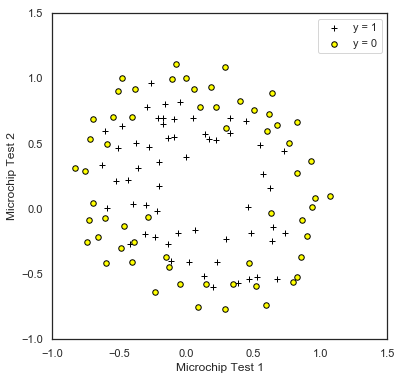

In [54]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(positive['test1'], positive['test2'], linewidth=1, s=30, c='black',edgecolors='black', marker='+', label='y = 1')
ax.scatter(negative['test1'], negative['test2'], linewidth=1, s=30, c='yellow',edgecolors='black', marker='o', label='y = 0')
ax.legend(loc=1)
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
plt.xlim((-1, 1.5))
plt.ylim((-1, 1.5))
plt.show()

In [72]:
def feature_mapping(X, power, as_ndarray=False):

    m, n = X.shape
    
    if n == 1:
        
        data = {'f{}'.format(i): np.power(X, i) for i in range(1, power + 1)}
        df = pd.DataFrame(data)
        return df.as_matrix() if as_ndarray else df
    
    elif n == 2:
    
        x1 = X[:,-2]
        x2 = X[:,-1]
        
        data = {"f{}{}".format(i - p, p): np.power(x1, i - p) * np.power(x2, p)
                    for i in np.arange(power + 1)
                    for p in np.arange(i + 1)
                }
        return pd.DataFrame(data).as_matrix() if as_ndarray else pd.DataFrame(data)

In [56]:
#data2.insert(0, 'Ones', 1)
#X = np.array(data2.iloc[:, 0:-1].values)
#x1 = np.array(data2.test1)
#x2 = np.array(data2.test2)
X = np.array(data2.iloc[:, :-1].values)
y = np.array(data2.iloc[:, -1:].values)

In [57]:
# Add Polynomial Features
# you are given a dataset with data points that are not linearly separable. 
# However, you would still like to use logistic regression to classify the data points.
# To do so, you introduce more features to use
# in particular, you add polynomial features to our data matrix (similar to polynomial regression).
# Note that feature_mapping also adds a column of ones for us, so the intercept term is handled
X = feature_mapping(X, 6)
m, n = X.shape

In [58]:
X.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [59]:
# Test compute cost and grad
initial_theta = np.zeros([X.shape[1], 1])
Lambda = 1
[cost, grad] = logisticRegressionCostFunction(X, y, initial_theta, Lambda)

In [60]:
# Cost at initial theta (zeros): 0.693147 (Expected cost approx 0.693)
cost[0]

0.6931471805599454

In [61]:
# Gradient at initial theta (zeros) - first five values only:
# 0.0085  0.0188  0.0001  0.0503  0.0115 (Expected gradients)
grad.head()

,0
f00,0.008475
f10,0.018788
f01,0.000078
f20,0.050345
f11,0.011501


In [62]:
# Test compute cost and grad
initial_theta = np.ones([n, 1])
Lambda = 10
[cost, grad] = logisticRegressionCostFunction(X, y, initial_theta, Lambda)

In [63]:
# Cost at test theta (with lambda = 10): Expected cost approx 3.16
cost[0]

3.1645093316150095

In [64]:
# Gradient at initial theta (zeros) - first five values only:
# 0.3460  0.1614  0.1948  0.2269  0.0922 (Expected gradients)
grad.head()

,0
f00,0.346045
f10,0.161352
f01,0.194796
f20,0.226863
f11,0.092186


In [66]:
X = np.array(X.iloc[:, :].values)

In [67]:
initial_theta = np.zeros([n, 1])

In [68]:
alpha = 9
epoch = 200000
Lambda = 0

[theta_0, J_set] = batch_gradient_descent(X, y, initial_theta, epoch, alpha, Lambda);

In [69]:
alpha = 0.3
epoch = 200000
Lambda = 1

[theta_1, J_set] = batch_gradient_descent(X, y, initial_theta, epoch, alpha, Lambda);

In [70]:
alpha = 0.3
epoch = 200000
Lambda = 10

[theta_10, J_set] = batch_gradient_descent(X, y, initial_theta, epoch, alpha, Lambda);

In [71]:
alpha = 0.3
epoch = 200000
Lambda = 100

[theta_100, J_set] = batch_gradient_descent(X, y, initial_theta, epoch, alpha, Lambda);

In [73]:
J_set[-10:-1]

[0.6864838338726167,
 0.6864838338726167,
 0.6864838338726167,
 0.6864838338726167,
 0.6864838338726167,
 0.6864838338726167,
 0.6864838338726167,
 0.6864838338726167,
 0.6864838338726167]

In [89]:
def feature_mapping_tmp(x1, x2, power, as_ndarray=False):
        data = {"f{}{}".format(i - p, p): np.power(x1, i - p) * np.power(x2, p)
                    for i in np.arange(power + 1)
                    for p in np.arange(i + 1)
                }
        return pd.DataFrame(data).as_matrix() if as_ndarray else pd.DataFrame(data)

In [93]:
# Here is the grid range
u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);

z0 = np.zeros([len(u), len(v)]);
z1 = np.zeros([len(u), len(v)]);
z10 = np.zeros([len(u), len(v)]);
z100 = np.zeros([len(u), len(v)]);
# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        #z(i,j) = mapFeature(u(i), v(j))*theta;
        z0[i,j] = (feature_mapping_tmp([u[i]], [v[j]], 6) @ theta_0).values[0, 0]
        z1[i,j] = (feature_mapping_tmp([u[i]], [v[j]], 6) @ theta_1).values[0, 0]
        z10[i,j] = (feature_mapping_tmp([u[i]], [v[j]], 6) @ theta_10).values[0, 0]
        z100[i,j] = (feature_mapping_tmp([u[i]], [v[j]], 6) @ theta_100).values[0, 0]

# important to transpose z before calling contour
z0 = z0.T 
z1 = z1.T
z10 = z10.T
z100 = z100.T

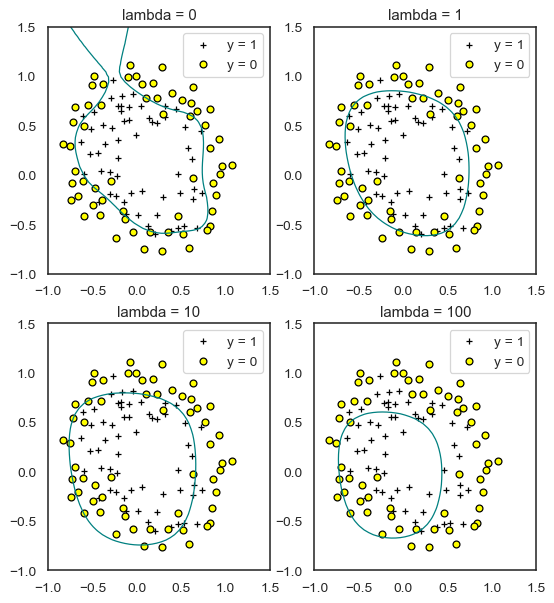

In [94]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

%matplotlib inline
fig = plt.figure(dpi=90, num=1, figsize=(7,8))

ax1 = fig.add_subplot(221)
ax1.scatter(positive['test1'], positive['test2'], linewidth=1, s=30, c='black',edgecolors='black', marker='+', label='y = 1')
ax1.scatter(negative['test1'], negative['test2'], linewidth=1, s=30, c='yellow',edgecolors='black', marker='o', label='y = 0')
ax1.legend(loc=1)
#ax1.set_xlabel('Microchip Test 1')
#ax1.set_ylabel('Microchip Test 2')
ax1.set_title('lambda = 0')
plt.xlim((-1, 1.5))
plt.ylim((-1, 1.5))
ax1.contour(u, v, z0, [0], linewidths=1, colors='teal')

ax2 = fig.add_subplot(222)
ax2.scatter(positive['test1'], positive['test2'], linewidth=1, s=30, c='black',edgecolors='black', marker='+', label='y = 1')
ax2.scatter(negative['test1'], negative['test2'], linewidth=1, s=30, c='yellow',edgecolors='black', marker='o', label='y = 0')
ax2.legend(loc=1)
#ax2.set_xlabel('Microchip Test 1')
#ax2.set_ylabel('Microchip Test 2')
ax2.set_title('lambda = 1')
plt.xlim((-1, 1.5))
plt.ylim((-1, 1.5))
ax2.contour(u, v, z1, [0], linewidths=1, colors='teal')

ax3 = fig.add_subplot(223)
ax3.scatter(positive['test1'], positive['test2'], linewidth=1, s=30, c='black',edgecolors='black', marker='+', label='y = 1')
ax3.scatter(negative['test1'], negative['test2'], linewidth=1, s=30, c='yellow',edgecolors='black', marker='o', label='y = 0')
ax3.legend(loc=1)
#ax3.set_xlabel('Microchip Test 1')
#ax3.set_ylabel('Microchip Test 2')
ax3.set_title('lambda = 10')
plt.xlim((-1, 1.5))
plt.ylim((-1, 1.5))
ax3.contour(u, v, z10, [0], linewidths=1, colors='teal')

ax4 = fig.add_subplot(224)
ax4.scatter(positive['test1'], positive['test2'], linewidth=1, s=30, c='black',edgecolors='black', marker='+', label='y = 1')
ax4.scatter(negative['test1'], negative['test2'], linewidth=1, s=30, c='yellow',edgecolors='black', marker='o', label='y = 0')
ax4.legend(loc=1)
#ax4.set_xlabel('Microchip Test 1')
#ax4.set_ylabel('Microchip Test 2')
ax4.set_title('lambda = 100')
plt.xlim((-1, 1.5))
plt.ylim((-1, 1.5))
ax4.contour(u, v, z100, [0], linewidths=1, colors='teal')

plt.show()

# Logistic Regression with One-vs-all
---

In [95]:
def predictOneVsAll(X, all_theta):
    m, n = X.shape
    num_labels = all_theta.shape[0]
    p = np.zeros([m, 1]);
    X = np.hstack((np.ones([m, 1]), X)); # Add ones to the X data matrix
    probMatrix = X @ all_theta.T;
    return np.matrix(np.argmax(probMatrix, axis=1) + 1).T

In [96]:
def oneVsAll(X, y, num_labels, Lambda=0.1, epoch=1500, alpha=0.3):
    m, n = X.shape
    all_theta = np.zeros([num_labels, n + 1]);
    X = np.hstack((np.ones([m, 1]), X))
    initial_theta = np.zeros([n+1,1]);

    for i in range(num_labels):
        y_b = np.array([1 if label == i+1 else 0 for label in y]).reshape([m, 1])
        [theta, J_set] = batch_gradient_descent(X, y_b, initial_theta, epoch, alpha, Lambda);
        all_theta[i,:] = theta.T
        print('Iteration\t' + str(epoch) + '\t|\tCost: ' + str(J_set[-1]))

    return all_theta

In [97]:
# Loading and Visualizing Data ...
data = sio.loadmat('ex2data3.mat'); # training data stored in arrays X, y
X = data['X']
y = data['y']
m, n = X.shape
m, n, data, X.shape, y.shape

(5000,
 400,
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
  '__version__': '1.0',
  '__globals__': [],
  'X': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  'y': array([[10],
         [10],
         [10],
         ...,
         [ 9],
         [ 9],
         [ 9]], dtype=uint8)},
 (5000, 400),
 (5000, 1))

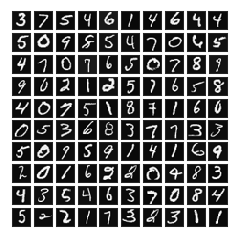

In [98]:
# Randomly select 100 data points to display
fig = plt.figure(dpi=60, num=1, figsize=(3.5, 3.5))
X_show_100 = X[np.random.randint(0, X.shape[0], 100),:]
for i in range(1, 101):
    ax = fig.add_subplot(10, 10, i)
    ax.imshow(X_show_100[i-1,:].reshape(20, 20).T, cmap='gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout(-1)
plt.show()

In [99]:
np.unique(y) # See how many labels there are

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [100]:
# Testing logisticRegressionCostFunction() with regularization 
theta = np.array([[-2],[-1],[1],[2]])
X_t = np.hstack((np.ones([5, 1]), np.arange(1, 16).reshape(3, 5).T / 10))
y_t = np.array([[1],[0],[1],[0],[1]])
Lambda = 3;
[J, grad] = logisticRegressionCostFunction(X_t, y_t, theta, Lambda);
J, grad
# Expected cost: 2.534819
# 0.146561 -0.548558  0.724722  1.398003  (Expected gradients)

(2.5348193961097443, array([[ 0.14656137],
        [-0.54855841],
        [ 0.72472227],
        [ 1.39800296]]))

In [101]:
# Training One-vs-All Logistic Regression...
# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
all_theta = oneVsAll(X, y, num_labels=10, Lambda=0.1, epoch=1000, alpha=1);

Iteration	1000	|	Cost: 0.02693519917718325
Iteration	1000	|	Cost: 0.06871614409068513
Iteration	1000	|	Cost: 0.07212321600367126
Iteration	1000	|	Cost: 0.05200264485300938
Iteration	1000	|	Cost: 0.07631446596466235
Iteration	1000	|	Cost: 0.034536636717571755
Iteration	1000	|	Cost: 0.0465435242721356
Iteration	1000	|	Cost: 0.09449132002012209
Iteration	1000	|	Cost: 0.08938937727477199
Iteration	1000	|	Cost: 0.01985633435534107


In [102]:
# Predict for One-Vs-All
predictions = predictOneVsAll(X, all_theta)

In [103]:
# 94.960000
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
print ('Training Set Accuracy: {0}%'.format(np.linalg.norm(correct, ord=1) / X.shape[0] * 100))

Training Set Accuracy: 93.22%
